In [1]:
import torch
import cv2
import os
import numpy as np
from time import time

In [7]:
# Load model
yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
classes = yolo.module.names if hasattr(yolo, 'module') else yolo.names
dev = 'cuda' if torch.cuda.is_available() else 'cpu'
yolo.to(dev)
print(f"Using {dev} device")
print(f"Classes: {classes}")

Using cache found in /home/ubuntu/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.2.0 CPU

100%|██████████| 14.1M/14.1M [00:07<00:00, 1.93MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Using cpu device
Classes: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67:

In [13]:
# current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = os.getcwd()
# Load image with cv2
img_cv2 = cv2.imread(os.path.join(current_dir, "familia_escena.jpg"))
# Change color space from BGR to RGB
img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
# Score the image
results_cv2 = yolo(img_cv2)

In [14]:
# print properties from the image from cv2
print(f"Image from CV2:")
print(f"Image shape: {img_cv2.shape}")
print(f"Image dtype: {img_cv2.dtype}")
print(f"Image size: {img_cv2.size}")
print(f"Image width: {img_cv2.shape[1]}")
print(f"Image height: {img_cv2.shape[0]}")

Image from CV2:
Image shape: (866, 1300, 3)
Image dtype: uint8
Image size: 3377400
Image width: 1300
Image height: 866


In [15]:
# Print resutls cv2
print(f"Results from CV2:")
results_cv2.print()

image 1/1: 866x1300 4 persons, 1 sports ball
Speed: 20.6ms pre-process, 1553.7ms inference, 4.2ms NMS per image at shape (1, 3, 448, 640)


Results from CV2:


In [16]:
# Print results cv2
print(f"Results cv2: \n{results_cv2.pandas().xyxy[0]}")

Results cv2: 
         xmin        ymin         xmax        ymax  confidence  class  \
0  911.217957  329.639618  1053.538940  719.364197    0.924623      0   
1  520.311401  158.895767   726.416016  692.829041    0.924084      0   
2  750.999695  221.051392   914.082397  718.691650    0.920678      0   
3  421.014282  361.338806   598.651062  696.833252    0.904722      0   
4  563.956238  697.988586   689.034302  798.280212    0.898199     32   

          name  
0       person  
1       person  
2       person  
3       person  
4  sports ball  


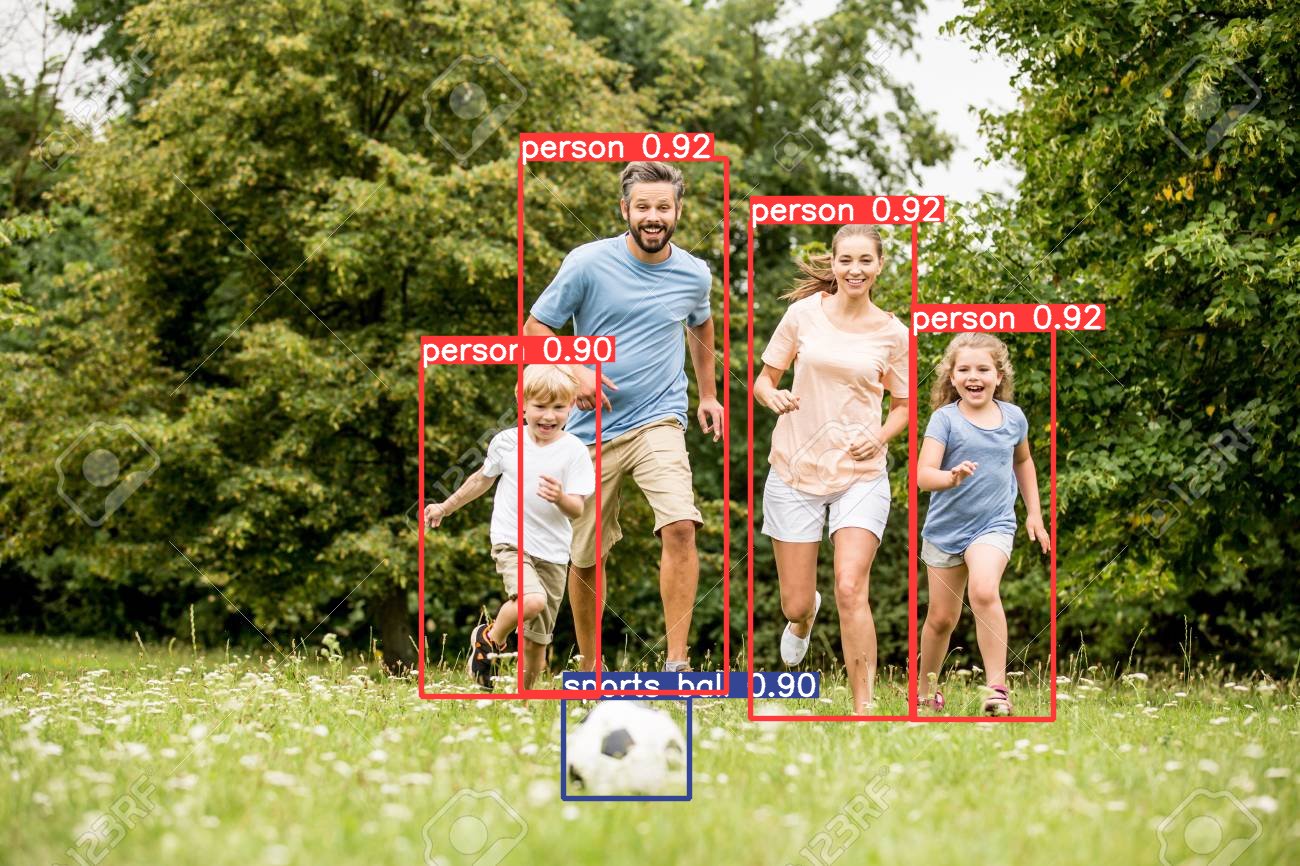

In [17]:
# Draw results from cv2
results_cv2.show()

In [20]:
%matplotlib inline

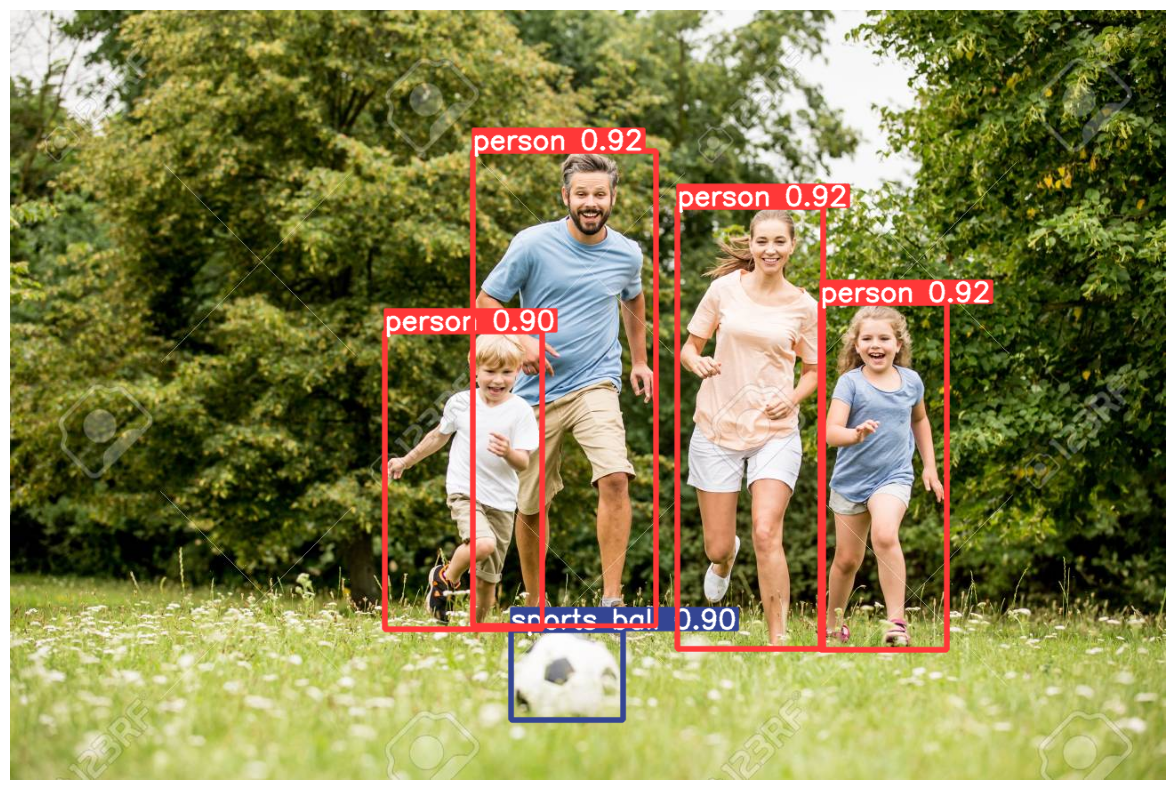

In [22]:
import matplotlib.pyplot as plt

# Draw results from cv2
images_result = results_cv2.render()

# Create the same number of plots than images in the results
fig, ax = plt.subplots(1, len(images_result), figsize=(20, 10))
# Check if there is more than one image
if len(images_result) > 1:
    for i in range(len(images_result)):
        ax[i].imshow(images_result[i])
        ax[i].axis('off')
else:
    ax.imshow(images_result[0])
    ax.axis('off')

plt.show()

---
# Custom Model 

In [2]:
# Load model
model_path = r"/home/ubuntu/yolo_customserver/model/epoch_80/best.pt"
yolo = torch.hub.load('/home/ubuntu/yolov5', 'custom', source='local', path=model_path, force_reload=True)
classes = yolo.module.names if hasattr(yolo, 'module') else yolo.names
dev = 'cuda' if torch.cuda.is_available() else 'cpu'
yolo.to(dev)
print(f"Using {dev} device")
print(f"Classes: {classes}")

YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.2.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Using cpu device
Classes: {0: 'good_weld', 1: 'bad_weld'}


In [3]:
current_dir = os.getcwd()

# Carga la imagen con opencv
img_cv2 = cv2.imread(os.path.join(current_dir, "07.jpg"))
# img_pil = Image.open(os.path.join(current_dir, "weld_image/08.jpg"))

# Score the image
# results_pil = yolo_custom(img_pil)
results_cv2 = yolo(img_cv2)

# Print results
# results_pil.print()
results_cv2.print()

image 1/1: 1600x900 1 good_weld
Speed: 25.7ms pre-process, 2701.9ms inference, 24.1ms NMS per image at shape (1, 3, 640, 384)


{'epoch': -1,
 'best_fitness': None,
 'model': DetectionModel(
   (model): Sequential(
     (0): Conv(
       (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
       (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (1): Conv(
       (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (2): C3(
       (cv1): Conv(
         (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
         (act): SiLU(inplace=True)
       )
       (cv2): Conv(
         (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_